# Amazon Web Scraping Project

In [34]:
# import libraries 

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots we will create

from bs4 import BeautifulSoup   # Importing BeautifulSoup for web scraping.
import requests                # Importing requests for making HTTP requests.
import smtplib                 # Importing smtplib for sending emails.
import time                    # Importing time for handling time-related functionality.
import datetime                # Importing datetime for working with dates and times.

# Markdown in Jupyter Notebook

<blockquote>Markdown: Block Quote Trial</blockquote>


> Markdown: Block Quote Trial


I'm giving a line break <br> here

<b>This is bold text </b> <br>
**This is bold text** <br>
__This is bold text__

<i>This is italian text </i> <br>
*This is italian text* <br>
_This is italian text_

---

- Main Point
    - Sub point ( use Tab before )
- Main Point 2

1. Main Point 1
    1. Sub point 1
2. Main Point 2

[Internal link: Go to section 2 - first you should define an ID for section 2](#section_2)

#### Here is my section 2 <a id='section_2'></a>

[Internal link: Go to section 2 - without ID](#Here-is-my-section-3)

#### Here is my section 3

__[External link: Go to google](http://www.google.com)__

# Project Start

In [63]:
# Connect to Website

URL = 'https://www.amazon.com/dp/B0BG6C9LJV/ref=sspa_dk_detail_1?pd_rd_i=B0BG6C9LJV&pd_rd_w=FLL9I&content-id=amzn1.sym.0d1092dc-81bb-493f-8769-d5c802257e94&pf_rd_p=0d1092dc-81bb-493f-8769-d5c802257e94&pf_rd_r=679R72YF5M5XQDGQ0YHQ&pd_rd_wg=Udyq7&pd_rd_r=c4b51695-da2c-40ac-835c-7726fed64944&s=apparel&sp_csd=d2lkZ2V0TmFtZT1zcF9kZXRhaWwy&th=1&psc=1'
# to get headers, go to here: http://localhost:8888/lab/tree/Desktop/data%20portfolio%202024/python/web_scraping/Amazon_Web_Scraper.ipynb
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36", "Accept-Encoding": "gzip, deflate, br", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers=headers)

In [64]:
soup1 = BeautifulSoup(page.content, "html.parser")   # Creating a BeautifulSoup object for parsing HTML content.

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.no
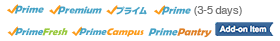

In [65]:
print(soup1)

In [66]:
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")   # Creating another BeautifulSoup object to prettify the HTML.

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-na.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.
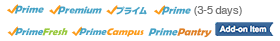

In [67]:
print(soup2)

In [102]:
title = soup2.find(id='productTitle').get_text()   # Extracting text content of the element with id 'productTitle'.


In [103]:
price = soup2.find('span', {'class':'a-offscreen'}).get_text()   # Extracting text content of the element with id 'priceblock_ourprice'.


In [104]:
rating = soup2.find('span', {'class':'a-size-base a-color-base'}).get_text()   # Extracting text content of the element with id 'priceblock_ourprice'.


In [105]:
print(title)
print(price)
print(rating)


                    Men's Funny I fix Stuff T-Shirt Mechanic Engineer Garage Tee Shirt
                   

                     $21.99
                    

                       4.7
                      


In [106]:
# Let's clean up the data a bit

price = price.strip()[1:]
type(price)

str

In [107]:
title = title.strip()
type(title)

str

In [108]:
rating = rating.strip() # Removing leading and trailing whitespaces from the variable 'rating'.
type(rating)

str

In [118]:
# I want to use timestap
import datetime
today = datetime.date.today()
print(today)

2023-12-24


In [119]:
import csv 

header = ["Title","Price","Rating","Date"]
data = [title,price,rating,today]

In [120]:
#with open('AmazonWebScraperDataset.csv','w',newline='',encoding='UTF8') as f: # Opening a CSV file in write mode with newline='' to handle line endings.
#    writer = csv.writer(f)
#    writer.writerow(header)
#    writer.writerow(data)

In [127]:
# Now let's append data to the csv

with open('AmazonWebScraperDataset.csv','a+',newline='',encoding='UTF8') as f: # Opening a CSV file in append mode with newline='' to handle line endings and specifying UTF8 encoding.
    writer = csv.writer(f) # Creating a CSV writer object.
    writer.writerow(data)   # Writing a row of data to the CSV file.

In [128]:
df = pd.read_csv("AmazonWebScraperDataset.csv")

In [129]:
# I want to automate this

Title  Price  Rating  \
0  Men's Funny I fix Stuff T-Shirt Mechanic Engin...  21.99     4.7   
1  Men's Funny I fix Stuff T-Shirt Mechanic Engin...  21.99     4.7   
2  Men's Funny I fix Stuff T-Shirt Mechanic Engin...  21.99     4.7   

         Date  
0  2023-12-24  
1  2023-12-24  
2  2023-12-24

In [131]:
def check_price():
    URL = 'https://www.amazon.com/dp/B0BG6C9LJV/ref=sspa_dk_detail_1?pd_rd_i=B0BG6C9LJV&pd_rd_w=FLL9I&content-id=amzn1.sym.0d1092dc-81bb-493f-8769-d5c802257e94&pf_rd_p=0d1092dc-81bb-493f-8769-d5c802257e94&pf_rd_r=679R72YF5M5XQDGQ0YHQ&pd_rd_wg=Udyq7&pd_rd_r=c4b51695-da2c-40ac-835c-7726fed64944&s=apparel&sp_csd=d2lkZ2V0TmFtZT1zcF9kZXRhaWwy&th=1&psc=1'
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36", "Accept-Encoding": "gzip, deflate, br", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
    page = requests.get(URL, headers=headers)
    title = soup2.find(id='productTitle').get_text()   # Extracting text content of the element with id 'productTitle'.
    price = soup2.find('span', {'class':'a-offscreen'}).get_text()   # Extracting text content of the element with id 'priceblock_ourprice'.
    rating = soup2.find('span', {'class':'a-size-base a-color-base'}).get_text()   # Extracting text content of the element with id 'priceblock_ourprice'.
    price = price.strip()[1:]
    title = title.strip()
    rating = rating.strip()
    
    import datetime
    today = datetime.date.today()
    
    import csv
    header = ["Title","Price","Rating","Date"]
    data = [title,price,rating,today]
    
    with open('AmazonWebScraperDataset.csv','a+',newline='',encoding='UTF8') as f: # Opening a CSV file in append mode with newline='' to handle line endings and specifying UTF8 encoding.
        writer = csv.writer(f) # Creating a CSV writer object.
        writer.writerow(data)   # Writing a row of data to the CSV file.

In [135]:
while(True):
    check_price()
    time.sleep(86400) # every 5 seconds, it is gonna through the process

KeyboardInterrupt: 

In [133]:
df = pd.read_csv("AmazonWebScraperDataset.csv")